In [1]:
#Assignment 1 DAVE3625
#Students: s345867 



In [2]:
# Task 1.1 5 unique features: "Fylke", "Kommune", "Område", "Linjetype" and "Linjeflyke"

In [7]:
%matplotlib inline
import pandas as pd

import matplotlib
from matplotlib import pyplot as plot
import numpy as np
from scipy import stats

url = "https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment1/Ruter_data.csv"
df = pd.read_csv(url,sep = ';')



In [8]:
#Number of Bus Lines per Municipality
df.head(10)

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10
5,3110-2020-08-01T16:16:00+02:00,01/08/2020,Oslo,Nordøst,Bjerke,Veitvet (mot Kalbakken),Rødtvet (mot Kalbakken),Lokal,Oslo,31,0,17:22:56,17:23:23,17:16:00,17:16:00,151,8
6,15010-2020-07-28T13:09:00+02:00,28/07/2020,Viken,Vest,Bærum,Nedre Toppenhaug,Øvre Toppenhaug,Lokal,Viken,150,0,13:19:00,13:19:05,13:17:00,13:17:00,112,1
7,15003-2020-07-27T06:18:00+02:00,27/07/2020,Oslo,Indre By,St.Hanshaugen,Hammersborggata (ved Storgata retning vest),St. Olavs plass (mot Frederiks gate),Lokal,Viken,150,1,06:20:24,06:20:29,06:20:00,06:20:00,112,-1
8,21002-2020-08-16T14:33:00+02:00,16/08/2020,Viken,Vest,Bærum,Stein gård,Knabberudveien,Lokal,Viken,150,1,15:10:12,15:10:34,15:09:00,15:09:00,112,2
9,15002-2020-08-13T18:09:00+02:00,13/08/2020,Viken,Vest,Bærum,Bekkestua bussterminal (Plattform C),Stabekk skole,Lokal,Viken,150,0,18:37:41,18:38:19,18:29:00,18:29:00,112,4


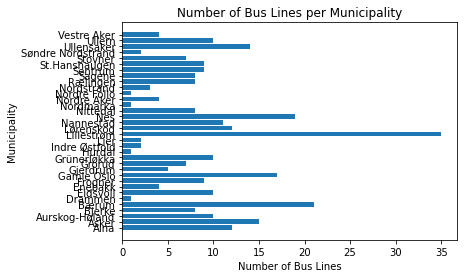

In [9]:
antall = df.groupby('Kommune')['Linjenavn'].nunique()
antall

plot.figure()
plot.barh(width=antall, y=antall.index)
plot.title('Number of Bus Lines per Municipality')
plot.xlabel('Number of Bus Lines')
plot.ylabel('Municipality')
plot.show()

In [17]:
#Ledig plasser
df["Ledige Plasser"] = 100 - ((df['Passasjerer_Ombord'] / df['Kjøretøy_Kapasitet']) * 100)


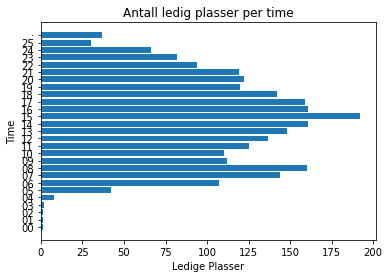

In [18]:
df["Timer"] = df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'].astype(str).str[:2]

antall = df.groupby('Timer')['Ledige Plasser'].nunique()
antall

plot.figure()
plot.barh(width=antall, y=antall.index)
plot.title('Antall ledig plasser per time')
plot.xlabel('Ledige Plasser')
plot.ylabel('Time')
plot.show()